In [2]:
import re
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import json as js
import urllib.request, urllib.parse, urllib.error
import matplotlib.pyplot as plt

In [3]:
page = requests.get("https://swapi.dev/api/")
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

{"people":"https://swapi.dev/api/people/","planets":"https://swapi.dev/api/planets/","films":"https://swapi.dev/api/films/","species":"https://swapi.dev/api/species/","vehicles":"https://swapi.dev/api/vehicles/","starships":"https://swapi.dev/api/starships/"}



In [4]:
# Connecting to the web pages
people_page = requests.get("https://swapi.dev/api/people/")
planets_page = requests.get("https://swapi.dev/api/planets/")
films_page = requests.get("https://swapi.dev/api/films/")
species_page = requests.get("https://swapi.dev/api/species/")
vehicles_page = requests.get("https://swapi.dev/api/vehicles/")
starships_page = requests.get("https://swapi.dev/api/starships/")

In [5]:
# Extracting the website data
people = BeautifulSoup(people_page.content, 'html.parser')
planets = BeautifulSoup(planets_page.content, 'html.parser')
films = BeautifulSoup(films_page.content, 'html.parser')
species = BeautifulSoup(species_page.content, 'html.parser')
vehicles = BeautifulSoup(vehicles_page.content, 'html.parser')
starships = BeautifulSoup(starships_page.content, 'html.parser')

In [6]:
print(people.prettify())

{"count":82,"next":"https://swapi.dev/api/people/?page=2","previous":null,"results":[{"name":"Luke Skywalker","height":"172","mass":"77","hair_color":"blond","skin_color":"fair","eye_color":"blue","birth_year":"19BBY","gender":"male","homeworld":"https://swapi.dev/api/planets/1/","films":["https://swapi.dev/api/films/1/","https://swapi.dev/api/films/2/","https://swapi.dev/api/films/3/","https://swapi.dev/api/films/6/"],"species":[],"vehicles":["https://swapi.dev/api/vehicles/14/","https://swapi.dev/api/vehicles/30/"],"starships":["https://swapi.dev/api/starships/12/","https://swapi.dev/api/starships/22/"],"created":"2014-12-09T13:50:51.644000Z","edited":"2014-12-20T21:17:56.891000Z","url":"https://swapi.dev/api/people/1/"},{"name":"C-3PO","height":"167","mass":"75","hair_color":"n/a","skin_color":"gold","eye_color":"yellow","birth_year":"112BBY","gender":"n/a","homeworld":"https://swapi.dev/api/planets/1/","films":["https://swapi.dev/api/films/1/","https://swapi.dev/api/films/2/","http

In [7]:
###############    PEOPLE   ######################
people_data = people_page.json()['results']
people_df = pd.DataFrame(people_data)
people_df

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/
5,Owen Lars,178,120,"brown, grey",light,blue,52BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:52:14.024000Z,2014-12-20T21:17:50.317000Z,https://swapi.dev/api/people/6/
6,Beru Whitesun lars,165,75,brown,light,blue,47BBY,female,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-10T15:53:41.121000Z,2014-12-20T21:17:50.319000Z,https://swapi.dev/api/people/7/
7,R5-D4,97,32,n/a,"white, red",red,unknown,n/a,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:57:50.959000Z,2014-12-20T21:17:50.321000Z,https://swapi.dev/api/people/8/
8,Biggs Darklighter,183,84,black,light,brown,24BBY,male,https://swapi.dev/api/planets/1/,[https://swapi.dev/api/films/1/],[],[],[https://swapi.dev/api/starships/12/],2014-12-10T15:59:50.509000Z,2014-12-20T21:17:50.323000Z,https://swapi.dev/api/people/9/
9,Obi-Wan Kenobi,182,77,"auburn, white",fair,blue-gray,57BBY,male,https://swapi.dev/api/planets/20/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/38/],"[https://swapi.dev/api/starships/48/, https://...",2014-12-10T16:16:29.192000Z,2014-12-20T21:17:50.325000Z,https://swapi.dev/api/people/10/


In [8]:
# The peoples data contains more entries on new webpages
next = people_page.json()['next']
len(next)

peoples = []
peoples.append(people_df)
try:
  while len(next) >0:
      next_page = requests.get(next)
      people_data_dummy = next_page.json()['results']
      dummy_df = pd.DataFrame(people_data_dummy)
      peoples.append(dummy_df)
      next = next_page.json()['next']
      dummy_df.head(3)
      print("Loading...")
except:
      print("the end!")


Loading...
Loading...
Loading...
Loading...
Loading...
Loading...
Loading...
Loading...
the end!


In [9]:
peoples_df = pd.concat(peoples)
peoples_df = peoples_df.reset_index(drop=True)
peoples_df

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Grievous,216,159,none,"brown, white","green, yellow",unknown,male,https://swapi.dev/api/planets/59/,[https://swapi.dev/api/films/6/],[https://swapi.dev/api/species/36/],[https://swapi.dev/api/vehicles/60/],[https://swapi.dev/api/starships/74/],2014-12-20T19:43:53.348000Z,2014-12-20T21:17:50.488000Z,https://swapi.dev/api/people/79/
78,Tarfful,234,136,brown,brown,blue,unknown,male,https://swapi.dev/api/planets/14/,[https://swapi.dev/api/films/6/],[https://swapi.dev/api/species/3/],[],[],2014-12-20T19:46:34.209000Z,2014-12-20T21:17:50.491000Z,https://swapi.dev/api/people/80/
79,Raymus Antilles,188,79,brown,light,brown,unknown,male,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-20T19:49:35.583000Z,2014-12-20T21:17:50.493000Z,https://swapi.dev/api/people/81/
80,Sly Moore,178,48,none,pale,white,unknown,female,https://swapi.dev/api/planets/60/,"[https://swapi.dev/api/films/5/, https://swapi...",[],[],[],2014-12-20T20:18:37.619000Z,2014-12-20T21:17:50.496000Z,https://swapi.dev/api/people/82/


In [10]:
###############    PLANETS   ######################
planets_data = planets_page.json()['results']
planets_df = pd.DataFrame(planets_data)
planets_df.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[https://swapi.dev/api/people/5/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[https://swapi.dev/api/films/1/],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],[https://swapi.dev/api/films/2/],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown,[],"[https://swapi.dev/api/films/2/, https://swapi...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/


In [11]:
###############    FILMS   ######################
films_data = films_page.json()['results']
films_df = pd.DataFrame(films_data)
films_df.head()

,title,episode_id,opening_crawl,director,producer,release_date,characters,planets,starships,vehicles,species,created,edited,url
0,A New Hope,4,It is a period of civil war.\r\nRebel spaceshi...,George Lucas,"Gary Kurtz, Rick McCallum",1977-05-25,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/planets/1/, https://swa...","[https://swapi.dev/api/starships/2/, https://s...","[https://swapi.dev/api/vehicles/4/, https://sw...","[https://swapi.dev/api/species/1/, https://swa...",2014-12-10T14:23:31.880000Z,2014-12-20T19:49:45.256000Z,https://swapi.dev/api/films/1/
1,The Empire Strikes Back,5,It is a dark time for the\r\nRebellion. Althou...,Irvin Kershner,"Gary Kurtz, Rick McCallum",1980-05-17,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/planets/4/, https://swa...","[https://swapi.dev/api/starships/3/, https://s...","[https://swapi.dev/api/vehicles/8/, https://sw...","[https://swapi.dev/api/species/1/, https://swa...",2014-12-12T11:26:24.656000Z,2014-12-15T13:07:53.386000Z,https://swapi.dev/api/films/2/
2,Return of the Jedi,6,Luke Skywalker has returned to\r\nhis home pla...,Richard Marquand,"Howard G. Kazanjian, George Lucas, Rick McCallum",1983-05-25,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/planets/1/, https://swa...","[https://swapi.dev/api/starships/2/, https://s...","[https://swapi.dev/api/vehicles/8/, https://sw...","[https://swapi.dev/api/species/1/, https://swa...",2014-12-18T10:39:33.255000Z,2014-12-20T09:48:37.462000Z,https://swapi.dev/api/films/3/
3,The Phantom Menace,1,Turmoil has engulfed the\r\nGalactic Republic....,George Lucas,Rick McCallum,1999-05-19,"[https://swapi.dev/api/people/2/, https://swap...","[https://swapi.dev/api/planets/1/, https://swa...","[https://swapi.dev/api/starships/31/, https://...","[https://swapi.dev/api/vehicles/33/, https://s...","[https://swapi.dev/api/species/1/, https://swa...",2014-12-19T16:52:55.740000Z,2014-12-20T10:54:07.216000Z,https://swapi.dev/api/films/4/
4,Attack of the Clones,2,There is unrest in the Galactic\r\nSenate. Sev...,George Lucas,Rick McCallum,2002-05-16,"[https://swapi.dev/api/people/2/, https://swap...","[https://swapi.dev/api/planets/1/, https://swa...","[https://swapi.dev/api/starships/21/, https://...","[https://swapi.dev/api/vehicles/4/, https://sw...","[https://swapi.dev/api/species/1/, https://swa...",2014-12-20T10:57:57.886000Z,2014-12-20T20:18:48.516000Z,https://swapi.dev/api/films/5/


In [12]:
###############    SPECIES   ######################
species_data = species_page.json()['results']
species_df = pd.DataFrame(species_data)
species_df.head()

,name,classification,designation,average_height,skin_colors,hair_colors,eye_colors,average_lifespan,homeworld,language,people,films,created,edited,url
0,Human,mammal,sentient,180,"caucasian, black, asian, hispanic","blonde, brown, black, red","brown, blue, green, hazel, grey, amber",120,https://swapi.dev/api/planets/9/,Galactic Basic,"[https://swapi.dev/api/people/66/, https://swa...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T13:52:11.567000Z,2014-12-20T21:36:42.136000Z,https://swapi.dev/api/species/1/
1,Droid,artificial,sentient,n/a,n/a,n/a,n/a,indefinite,None,n/a,"[https://swapi.dev/api/people/2/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T15:16:16.259000Z,2014-12-20T21:36:42.139000Z,https://swapi.dev/api/species/2/
2,Wookie,mammal,sentient,210,gray,"black, brown","blue, green, yellow, brown, golden, red",400,https://swapi.dev/api/planets/14/,Shyriiwook,"[https://swapi.dev/api/people/13/, https://swa...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T16:44:31.486000Z,2014-12-20T21:36:42.142000Z,https://swapi.dev/api/species/3/
3,Rodian,sentient,reptilian,170,"green, blue",n/a,black,unknown,https://swapi.dev/api/planets/23/,Galatic Basic,[https://swapi.dev/api/people/15/],[https://swapi.dev/api/films/1/],2014-12-10T17:05:26.471000Z,2014-12-20T21:36:42.144000Z,https://swapi.dev/api/species/4/
4,Hutt,gastropod,sentient,300,"green, brown, tan",n/a,"yellow, red",1000,https://swapi.dev/api/planets/24/,Huttese,[https://swapi.dev/api/people/16/],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T17:12:50.410000Z,2014-12-20T21:36:42.146000Z,https://swapi.dev/api/species/5/


In [13]:
###############    VEHICLES   ######################
vehicles_data = vehicles_page.json()['results']
vehicles_df = pd.DataFrame(vehicles_data)
vehicles_df.head()

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,vehicle_class,pilots,films,created,edited,url
0,Sand Crawler,Digger Crawler,Corellia Mining Corporation,150000,36.8,30,46,30,50000,2 months,wheeled,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T15:36:25.724000Z,2014-12-20T21:30:21.661000Z,https://swapi.dev/api/vehicles/4/
1,T-16 skyhopper,T-16 skyhopper,Incom Corporation,14500,10.4,1200,1,1,50,0,repulsorcraft,[],[https://swapi.dev/api/films/1/],2014-12-10T16:01:52.434000Z,2014-12-20T21:30:21.665000Z,https://swapi.dev/api/vehicles/6/
2,X-34 landspeeder,X-34 landspeeder,SoroSuub Corporation,10550,3.4,250,1,1,5,unknown,repulsorcraft,[],[https://swapi.dev/api/films/1/],2014-12-10T16:13:52.586000Z,2014-12-20T21:30:21.668000Z,https://swapi.dev/api/vehicles/7/
3,TIE/LN starfighter,Twin Ion Engine/Ln Starfighter,Sienar Fleet Systems,unknown,6.4,1200,1,0,65,2 days,starfighter,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T16:33:52.860000Z,2014-12-20T21:30:21.670000Z,https://swapi.dev/api/vehicles/8/
4,Snowspeeder,t-47 airspeeder,Incom corporation,unknown,4.5,650,2,0,10,none,airspeeder,"[https://swapi.dev/api/people/1/, https://swap...",[https://swapi.dev/api/films/2/],2014-12-15T12:22:12Z,2014-12-20T21:30:21.672000Z,https://swapi.dev/api/vehicles/14/


In [14]:
###############    SPACESHIPS   ######################
starships_data = starships_page.json()['results']
starships_df = pd.DataFrame(starships_data)
starships_df.head()

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",n/a,36000000,2 years,2.0,60,Star Destroyer,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],[https://swapi.dev/api/films/1/],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/
3,Death Star,DS-1 Orbital Battle Station,"Imperial Department of Military Research, Sien...",1000000000000,120000,n/a,"342,953","843,342",1000000000000,3 years,4.0,10,Deep Space Mobile Battlestation,[],[https://swapi.dev/api/films/1/],2014-12-10T16:36:50.509000Z,2014-12-20T21:26:24.783000Z,https://swapi.dev/api/starships/9/
4,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,100000,34.37,1050,4,6,100000,2 months,0.5,75,Light freighter,"[https://swapi.dev/api/people/13/, https://swa...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T16:59:45.094000Z,2014-12-20T21:23:49.880000Z,https://swapi.dev/api/starships/10/


In [15]:
# Let's clean up the people dataframe!
peoples_df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/


In [16]:
hm_links = peoples_df['homeworld'].tolist()
flm_links = peoples_df['films'].tolist()
spcs_links = peoples_df['species'].tolist()
vhcls_links = peoples_df['vehicles'].tolist()
strshps_links = peoples_df['starships'].tolist()

for i,p in peoples_df.iterrows():
  #homeworld
  hm = requests.get(hm_links[i])
  p['homeworld'] = hm.json()

  #films
  for f in flm_links[i]:
    flm = requests.get(f)
    p['films'] = p['films'] + list(flm.json().items())

  #species
  try:  
      spcs = requests.get(spcs_links[i][0])
      p['species'] = spcs.json()
  except:
      p['species'] = ""

  #vehicles
  for v in vhcls_links[i]:
    try:
      vhcl = requests.get(v)
      p['vehicles'] = vhcl.json()
    except:
      p['vehicles'] = ""

  #starships
  for s in strshps_links[i]:
    try:
      strshps = requests.get(s)
      p['starships'] = strshps.json()
    except:
      p['starships'] = ""
      
  print("Character no {} done!".format(i+1))

Character no 1 done!
Character no 2 done!
Character no 3 done!
Character no 4 done!
Character no 5 done!
Character no 6 done!
Character no 7 done!
Character no 8 done!
Character no 9 done!
Character no 10 done!
Character no 11 done!
Character no 12 done!
Character no 13 done!
Character no 14 done!
Character no 15 done!
Character no 16 done!
Character no 17 done!
Character no 18 done!
Character no 19 done!
Character no 20 done!
Character no 21 done!
Character no 22 done!
Character no 23 done!
Character no 24 done!
Character no 25 done!
Character no 26 done!
Character no 27 done!
Character no 28 done!
Character no 29 done!
Character no 30 done!
Character no 31 done!
Character no 32 done!
Character no 33 done!
Character no 34 done!
Character no 35 done!
Character no 36 done!
Character no 37 done!
Character no 38 done!
Character no 39 done!
Character no 40 done!
Character no 41 done!
Character no 42 done!
Character no 43 done!
Character no 44 done!
Character no 45 done!
Character no 46 don

In [17]:
peoples_df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,"{'name': 'Tatooine', 'rotation_period': '23', ...","[https://swapi.dev/api/films/1/, https://swapi...",,"{'name': 'Imperial Speeder Bike', 'model': '74...","{'name': 'Imperial shuttle', 'model': 'Lambda-...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,"{'name': 'Tatooine', 'rotation_period': '23', ...","[https://swapi.dev/api/films/1/, https://swapi...","{'name': 'Droid', 'classification': 'artificia...",[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,"{'name': 'Naboo', 'rotation_period': '26', 'or...","[https://swapi.dev/api/films/1/, https://swapi...","{'name': 'Droid', 'classification': 'artificia...",[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,"{'name': 'Tatooine', 'rotation_period': '23', ...","[https://swapi.dev/api/films/1/, https://swapi...",,[],"{'name': 'TIE Advanced x1', 'model': 'Twin Ion...",2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,"{'name': 'Alderaan', 'rotation_period': '24', ...","[https://swapi.dev/api/films/1/, https://swapi...",,"{'name': 'Imperial Speeder Bike', 'model': '74...",[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/


### Part 3
## Make a quick descriptive analysis of your dataframe using basic pandas methods
- use at least 5 methods


In [18]:
##################### EDA ####################################
# How many characters do we have?
print("The database contains data on {} characters".format(len(peoples_df)))

The database contains data on 82 characters


In [19]:
# How many movies do we have and what are their titles?
film_names = films_df['title']
print("There are {} movies and their names are: {}".format(len(film_names), ', '.join(film_names)))

There are 6 movies and their names are: A New Hope, The Empire Strikes Back, Return of the Jedi, The Phantom Menace, Attack of the Clones, Revenge of the Sith


In [20]:
# What does our data look like?
info = peoples_df.describe(include = 'all')
info

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
count,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82
unique,82,46,39,12,30,14,37,5,49,19,38,10,14,82,82,82
top,Luke Skywalker,183,unknown,none,fair,brown,unknown,male,"{'name': 'Naboo', 'rotation_period': '26', 'or...","[https://swapi.dev/api/films/5/, (title, Attac...",,[],[],2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
freq,1,7,23,36,17,20,39,60,11,13,32,71,63,1,1,1


In [21]:
#the different data type our data frame contains
peoples_df.dtypes.value_counts()

object    16
dtype: int64

In [22]:
#frequency of different hair colors
peoples_df['hair_color'].value_counts()

none             36
brown            16
black            12
n/a               5
white             4
blond             3
brown, grey       1
auburn, white     1
auburn, grey      1
grey              1
auburn            1
blonde            1
Name: hair_color, dtype: int64

In [23]:
#which is the most common skin color
freq = peoples_df['skin_color'].value_counts()
print("The most common skin color is {}".format(freq.idxmax()))

The most common skin color is fair


In [24]:
# What is the shape of our data?
peoples_df.shape

(82, 16)

In [25]:
# How many entries are empty?
peoples_df.isna().sum()

name          0
height        0
mass          0
hair_color    0
skin_color    0
eye_color     0
birth_year    0
gender        0
homeworld     0
films         0
species       0
vehicles      0
starships     0
created       0
edited        0
url           0
dtype: int64

In [26]:
# What are the columns of our data?
peoples_df.columns

Index(['name', 'height', 'mass', 'hair_color', 'skin_color', 'eye_color',
       'birth_year', 'gender', 'homeworld', 'films', 'species', 'vehicles',
       'starships', 'created', 'edited', 'url'],
      dtype='object')

### Part 4
## Add more data using other routes - lambda functions

In [27]:
############### ADDING MORE DATA ##############################
#BMI - are alien species healthy?
#Formula: bmi = weight/(height^2)
peoples_df['bmi']  = [float(s['mass'].replace(",",'')) / ((float(s['height'].replace(",",''))/ 100)**2) 
                      if s['mass'] != 'unknown' and s['height'] != "unknown"
                      else 0
                      for i,s in peoples_df.iterrows() 
]

# How old are these characters? 
#Return of the Jedi is set in 4 ABY
peoples_df['birth_year']
peoples_df['age'] = [int(re.findall("[0-9]+", s)[0]) + 4 if s != 'unknown' else 0 for s in peoples_df['birth_year']]


peoples_df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url,bmi,age
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,"{'name': 'Tatooine', 'rotation_period': '23', ...","[https://swapi.dev/api/films/1/, https://swapi...",,"{'name': 'Imperial Speeder Bike', 'model': '74...","{'name': 'Imperial shuttle', 'model': 'Lambda-...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/,26.027582,23
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,"{'name': 'Tatooine', 'rotation_period': '23', ...","[https://swapi.dev/api/films/1/, https://swapi...","{'name': 'Droid', 'classification': 'artificia...",[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/,26.892323,116
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,"{'name': 'Naboo', 'rotation_period': '26', 'or...","[https://swapi.dev/api/films/1/, https://swapi...","{'name': 'Droid', 'classification': 'artificia...",[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/,34.722222,37
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,"{'name': 'Tatooine', 'rotation_period': '23', ...","[https://swapi.dev/api/films/1/, https://swapi...",,[],"{'name': 'TIE Advanced x1', 'model': 'Twin Ion...",2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/,33.330066,45
4,Leia Organa,150,49,brown,light,brown,19BBY,female,"{'name': 'Alderaan', 'rotation_period': '24', ...","[https://swapi.dev/api/films/1/, https://swapi...",,"{'name': 'Imperial Speeder Bike', 'model': '74...",[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/,21.777778,23


In [28]:
#Year of creation of the characters
peoples_df['year']=peoples_df['created'].apply(lambda s: s.split('-')[0])
peoples_df.tail()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url,bmi,age,year
77,Grievous,216,159,none,"brown, white","green, yellow",unknown,male,"{'name': 'Kalee', 'rotation_period': '23', 'or...","[https://swapi.dev/api/films/6/, (title, Reven...","{'name': 'Kaleesh', 'classification': 'reptile...","{'name': 'Tsmeu-6 personal wheel bike', 'model...","{'name': 'Belbullab-22 starfighter', 'model': ...",2014-12-20T19:43:53.348000Z,2014-12-20T21:17:50.488000Z,https://swapi.dev/api/people/79/,34.079218,0,2014
78,Tarfful,234,136,brown,brown,blue,unknown,male,"{'name': 'Kashyyyk', 'rotation_period': '26', ...","[https://swapi.dev/api/films/6/, (title, Reven...","{'name': 'Wookie', 'classification': 'mammal',...",[],[],2014-12-20T19:46:34.209000Z,2014-12-20T21:17:50.491000Z,https://swapi.dev/api/people/80/,24.837461,0,2014
79,Raymus Antilles,188,79,brown,light,brown,unknown,male,"{'name': 'Alderaan', 'rotation_period': '24', ...","[https://swapi.dev/api/films/1/, https://swapi...",,[],[],2014-12-20T19:49:35.583000Z,2014-12-20T21:17:50.493000Z,https://swapi.dev/api/people/81/,22.351743,0,2014
80,Sly Moore,178,48,none,pale,white,unknown,female,"{'name': 'Umbara', 'rotation_period': 'unknown...","[https://swapi.dev/api/films/5/, https://swapi...",,[],[],2014-12-20T20:18:37.619000Z,2014-12-20T21:17:50.496000Z,https://swapi.dev/api/people/82/,15.149602,0,2014
81,Tion Medon,206,80,none,grey,black,unknown,male,"{'name': 'Utapau', 'rotation_period': '27', 'o...","[https://swapi.dev/api/films/6/, (title, Reven...","{'name': 'Pau'an', 'classification': 'mammal',...",[],[],2014-12-20T20:35:04.260000Z,2014-12-20T21:17:50.498000Z,https://swapi.dev/api/people/83/,18.851918,0,2014


### Part 5
##Cleaning Featuring - use at least 15 pandas or numpy methods

In [29]:
# We have an idea about our data now! Let's see if it needs any cleaning

# Getting rid of unwanted columns
clean_df = peoples_df.drop(columns=['created', 'edited'])

# Replacing unknown values with the correct type
clean_df[['hair_color', 'skin_color','eye_color']] = peoples_df[['hair_color', 'skin_color','eye_color']].replace('n/a.','')

# We will keep only the ship name in the starship column. 
clean_df['starships'] = [p.get('name') if len(p)>0 else "None"  for p in peoples_df['starships']]

# Same for vehicles
clean_df['vehicles'] = [p.get('name') if len(p)>0 else "None"  for p in peoples_df['vehicles']]

# And homeworlds
clean_df['homeworld'] = [p.get('name') if len(p)>0 else "None"  for p in peoples_df['homeworld']]

# Checking if all indexes are correct
clean_df['name'].is_unique

# Clean the birth year column
birthyears = ','.join(clean_df['birth_year']).split(",")
years = []
for b in birthyears:
  year = re.findall('\d+', b)
  if len(year)>0:
    years.append(int(year[0]))
  else:
    years.append(0)
clean_df['birth_year'] = years

# Check if all numeric columns make sense
clean_df.kurt(numeric_only=True)[:10] #No extreme skewness found

birth_year    36.775217
bmi           70.962490
age           36.170257
dtype: float64

In [30]:
# Continuation
clean_df['age'].describe()            #One character is 900 years old!!

count     82.000000
mean      47.987805
std      120.519707
min        0.000000
25%        0.000000
50%       21.000000
75%       56.000000
max      900.000000
Name: age, dtype: float64

In [31]:
super_old_dude = clean_df[clean_df['age'] == 900]['name']
super_old_dude                        

18    Yoda
Name: name, dtype: object

In [32]:
# Make sure all names are capitalized properly
import string
clean_df['name'] = [string.capwords(s) for s in clean_df['name']]

In [33]:
clean_df.sample(3)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,url,bmi,age,year
31,Nute Gunray,191,90,none,mottled green,red,0,male,Cato Neimoidia,"[https://swapi.dev/api/films/4/, https://swapi...","{'name': 'Neimodian', 'classification': 'unkno...",None,None,https://swapi.dev/api/people/33/,24.670376,0,2014
40,Quarsh Panaka,183,unknown,black,dark,brown,62,male,Naboo,"[https://swapi.dev/api/films/4/, (title, The P...",,None,None,https://swapi.dev/api/people/42/,0.000000,66,2014
42,Darth Maul,175,80,none,red,yellow,54,male,Dathomir,"[https://swapi.dev/api/films/4/, (title, The P...","{'name': 'Zabrak', 'classification': 'mammal',...",Sith speeder,Scimitar,https://swapi.dev/api/people/44/,26.122449,58,2014


### Part 6
## Get information through aggregation / mapping / description methods


In [35]:
#Providing special powers to people from different homeworlds

peoples_df['Powers']=clean_df['homeworld'].apply(lambda x: 'Morichro' if(x == 'Tatooine') else
                                                  'Flashburn' if(x == 'Alderaan') else
                                                 'Detoxify Poison' if(x == 'Yavin IV')
                                                 else None)
peoples_df.head(8)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url,bmi,age,year,Powers
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,"{'name': 'Tatooine', 'rotation_period': '23', ...","[https://swapi.dev/api/films/1/, https://swapi...",,"{'name': 'Imperial Speeder Bike', 'model': '74...","{'name': 'Imperial shuttle', 'model': 'Lambda-...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/,26.027582,23,2014,Morichro
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,"{'name': 'Tatooine', 'rotation_period': '23', ...","[https://swapi.dev/api/films/1/, https://swapi...","{'name': 'Droid', 'classification': 'artificia...",[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/,26.892323,116,2014,Morichro
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,"{'name': 'Naboo', 'rotation_period': '26', 'or...","[https://swapi.dev/api/films/1/, https://swapi...","{'name': 'Droid', 'classification': 'artificia...",[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/,34.722222,37,2014,None
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,"{'name': 'Tatooine', 'rotation_period': '23', ...","[https://swapi.dev/api/films/1/, https://swapi...",,[],"{'name': 'TIE Advanced x1', 'model': 'Twin Ion...",2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/,33.330066,45,2014,Morichro
4,Leia Organa,150,49,brown,light,brown,19BBY,female,"{'name': 'Alderaan', 'rotation_period': '24', ...","[https://swapi.dev/api/films/1/, https://swapi...",,"{'name': 'Imperial Speeder Bike', 'model': '74...",[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/,21.777778,23,2014,Flashburn
5,Owen Lars,178,120,"brown, grey",light,blue,52BBY,male,"{'name': 'Tatooine', 'rotation_period': '23', ...","[https://swapi.dev/api/films/1/, https://swapi...",,[],[],2014-12-10T15:52:14.024000Z,2014-12-20T21:17:50.317000Z,https://swapi.dev/api/people/6/,37.874006,56,2014,Morichro
6,Beru Whitesun lars,165,75,brown,light,blue,47BBY,female,"{'name': 'Tatooine', 'rotation_period': '23', ...","[https://swapi.dev/api/films/1/, https://swapi...",,[],[],2014-12-10T15:53:41.121000Z,2014-12-20T21:17:50.319000Z,https://swapi.dev/api/people/7/,27.548209,51,2014,Morichro
7,R5-D4,97,32,n/a,"white, red",red,unknown,n/a,"{'name': 'Tatooine', 'rotation_period': '23', ...","[https://swapi.dev/api/films/1/, (title, A New...","{'name': 'Droid', 'classification': 'artificia...",[],[],2014-12-10T15:57:50.959000Z,2014-12-20T21:17:50.321000Z,https://swapi.dev/api/people/8/,34.009990,0,2014,Morichro


In [36]:
# What is the gender distribution of our characters?
gender = pd.DataFrame(clean_df.groupby(['gender'])['gender'].count())
gender = gender.rename(columns={'gender': 'Count'})
gender 

,Count
gender,
female,17
hermaphrodite,1
male,60
n/a,3
none,1


In [37]:
# Who appears in most films?
sum = []
nr_of_appearances = [len([sum.append(1) for item in p if "title" in item]) for p in clean_df['films']]
characters = peoples_df['name']
d = {'Name':characters,'Nr of Movies':nr_of_appearances}
most_films = pd.DataFrame(d)
most_films.sort_values(by='Nr of Movies', ascending=False).head(10)

,Name,Nr of Movies
1,C-3PO,6
9,Obi-Wan Kenobi,6
2,R2-D2,6
19,Palpatine,5
18,Yoda,5
0,Luke Skywalker,4
3,Darth Vader,4
4,Leia Organa,4
12,Chewbacca,4
44,Ayla Secura,3


In [38]:
clean_df

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,url,bmi,age,year
0,Luke Skywalker,172,77,blond,fair,blue,19,male,Tatooine,"[https://swapi.dev/api/films/1/, https://swapi...",,Imperial Speeder Bike,Imperial shuttle,https://swapi.dev/api/people/1/,26.027582,23,2014
1,C-3po,167,75,n/a,gold,yellow,112,n/a,Tatooine,"[https://swapi.dev/api/films/1/, https://swapi...","{'name': 'Droid', 'classification': 'artificia...",None,None,https://swapi.dev/api/people/2/,26.892323,116,2014
2,R2-d2,96,32,n/a,"white, blue",red,33,n/a,Naboo,"[https://swapi.dev/api/films/1/, https://swapi...","{'name': 'Droid', 'classification': 'artificia...",None,None,https://swapi.dev/api/people/3/,34.722222,37,2014
3,Darth Vader,202,136,none,white,yellow,41,male,Tatooine,"[https://swapi.dev/api/films/1/, https://swapi...",,None,TIE Advanced x1,https://swapi.dev/api/people/4/,33.330066,45,2014
4,Leia Organa,150,49,brown,light,brown,19,female,Alderaan,"[https://swapi.dev/api/films/1/, https://swapi...",,Imperial Speeder Bike,None,https://swapi.dev/api/people/5/,21.777778,23,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Grievous,216,159,none,"brown, white","green, yellow",0,male,Kalee,"[https://swapi.dev/api/films/6/, (title, Reven...","{'name': 'Kaleesh', 'classification': 'reptile...",Tsmeu-6 personal wheel bike,Belbullab-22 starfighter,https://swapi.dev/api/people/79/,34.079218,0,2014
78,Tarfful,234,136,brown,brown,blue,0,male,Kashyyyk,"[https://swapi.dev/api/films/6/, (title, Reven...","{'name': 'Wookie', 'classification': 'mammal',...",None,None,https://swapi.dev/api/people/80/,24.837461,0,2014
79,Raymus Antilles,188,79,brown,light,brown,0,male,Alderaan,"[https://swapi.dev/api/films/1/, https://swapi...",,None,None,https://swapi.dev/api/people/81/,22.351743,0,2014
80,Sly Moore,178,48,none,pale,white,0,female,Umbara,"[https://swapi.dev/api/films/5/, https://swapi...",,None,None,https://swapi.dev/api/people/82/,15.149602,0,2014


In [39]:
# Most Populated planets
planets = [p.get('name') for p in peoples_df['homeworld']]
d = {'Name':characters,'Home World':planets}
home_worlds = pd.DataFrame(d)
most_populated = pd.DataFrame(home_worlds['Home World'].value_counts())
most_populated.head(5)

,Home World
Naboo,11
Tatooine,10
unknown,5
Alderaan,3
Coruscant,3


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\hritika kathuria\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


14    Greedo
Name: name, dtype: object

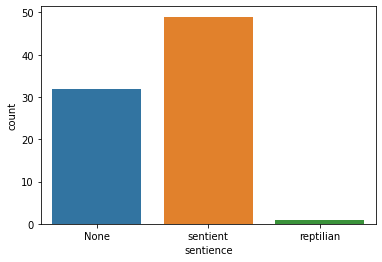

In [41]:
# I love AI and debates about consciousness so let's look more into that!
clean_df['sentience'] = [p.get('designation') if len(p)>0 else "None"  for p in peoples_df['species']]

sns.countplot(clean_df['sentience'])

# reptilians???
reptilians = clean_df[clean_df['sentience'] == "reptilian"]['name']
reptilians

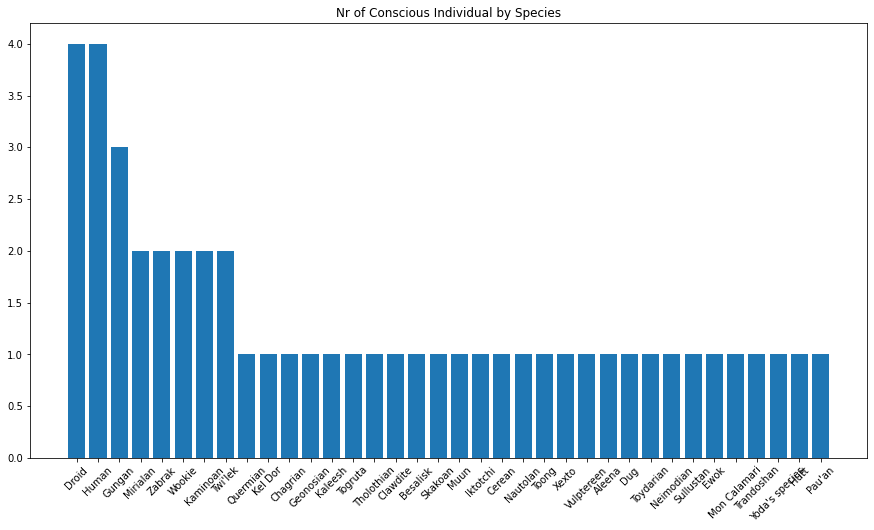

In [48]:
# What is the distribution of consciousness per species?
clean_df['species'] = [p.get('name') if len(p)>0 else "None"  for p in peoples_df['species']]
clean_df['classification'] = [p.get('classification') if len(p)>0 else "None"  for p in peoples_df['species']]

#distribution = clean_df.groupby('species')["consciousness" = 'sentient'].count()
distribution = clean_df[clean_df['sentience'] == 'sentient']['species'].value_counts().to_frame().reset_index()
distribution = distribution.rename(columns={'index': 'Species', 'species': 'Conscious individuals'})

plt.figure(figsize=(15, 8))
plt.bar(distribution['Species'], distribution["Conscious individuals"])
plt.xticks(rotation = 45)
plt.title("Nr of Conscious Individual by Species")
plt.show()

# AI is taking over!!!

In [49]:
# Ok, we talked about consciousness and AI...but has any character achieved immortality? Let's see how people are doing with respect to age and life expectancy
clean_df['life expectancy'] = [p.get('average_lifespan') if len(p)>0 else "None"  for p in peoples_df['species']]
clean_df['life expectancy'].unique()
clean_df['life expectancy'] = clean_df['life expectancy'].replace(['None','unknown'],0)
clean_df['life expectancy'] = clean_df['life expectancy'].replace(['indefinite'], np.Inf)
clean_df['life expectancy'] = [float(s) for s in clean_df['life expectancy']]

clean_df['doing_well_in_life'] = np.subtract(clean_df['age'], clean_df['life expectancy'] )
clean_df['doing_well_in_life'] = pd.cut(clean_df['doing_well_in_life'],bins=[-np.Inf,0,30,100, np.Inf],labels=['Less than expected...','Still alive!','Doing Well',"Immortal!!!"])


In [50]:
# but now we added lots of uneeded punctuation to our dataframe... let's clean it up :(
clean_df['doing_well_in_life'] = clean_df['doing_well_in_life'].str.replace('\W', ' ')

C:\Users\HRITIK~1\AppData\Local\Temp/ipykernel_1100/3668504740.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_df['doing_well_in_life'] = clean_df['doing_well_in_life'].str.replace('\W', ' ')


In [51]:
clean_df.head(5)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,...,vehicles,starships,url,bmi,age,year,sentience,classification,life expectancy,doing_well_in_life
0,Luke Skywalker,172,77,blond,fair,blue,19,male,Tatooine,"[https://swapi.dev/api/films/1/, https://swapi...",...,Imperial Speeder Bike,Imperial shuttle,https://swapi.dev/api/people/1/,26.027582,23,2014,None,None,0.0,Still alive
1,C-3po,167,75,n/a,gold,yellow,112,n/a,Tatooine,"[https://swapi.dev/api/films/1/, https://swapi...",...,None,None,https://swapi.dev/api/people/2/,26.892323,116,2014,sentient,artificial,inf,NaN
2,R2-d2,96,32,n/a,"white, blue",red,33,n/a,Naboo,"[https://swapi.dev/api/films/1/, https://swapi...",...,None,None,https://swapi.dev/api/people/3/,34.722222,37,2014,sentient,artificial,inf,NaN
3,Darth Vader,202,136,none,white,yellow,41,male,Tatooine,"[https://swapi.dev/api/films/1/, https://swapi...",...,None,TIE Advanced x1,https://swapi.dev/api/people/4/,33.330066,45,2014,None,None,0.0,Doing Well
4,Leia Organa,150,49,brown,light,brown,19,female,Alderaan,"[https://swapi.dev/api/films/1/, https://swapi...",...,Imperial Speeder Bike,None,https://swapi.dev/api/people/5/,21.777778,23,2014,None,None,0.0,Still alive


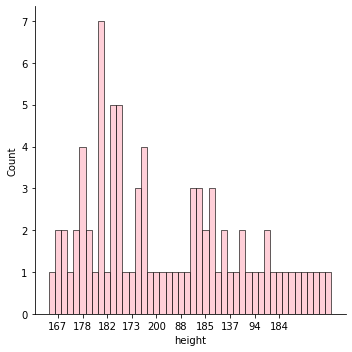

In [52]:
 #Converting height into an integer to plot it
peoples_df['height_int']=peoples_df['height'].apply(lambda x: np.where(x.isdigit(),x,'NaN'))
people_df['height_int']=pd.to_numeric(peoples_df['height_int'], errors='coerce').convert_dtypes()

#Plotting a histogram for height distribution
import seaborn as sns
%matplotlib inline
q = sns.displot(data = peoples_df, x = 'height', kind = 'hist', color = 'pink')
q.set(xticks=np.arange(1,40,4))

<AxesSubplot:xlabel='gender'>

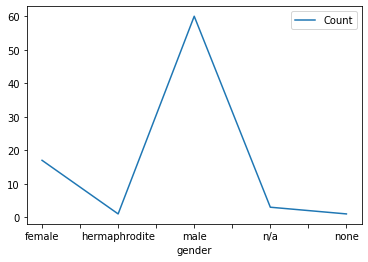

In [53]:
#Seeing the distribution of gender
gender.plot(use_index = True)

In [54]:
#Sorting people by their mass
peoples_df.sort_values(by=['mass'],ascending=True,inplace=False)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,...,vehicles,starships,created,edited,url,bmi,age,year,Powers,height_int
15,Jabba Desilijic Tiure,175,"1,358",n/a,"green-tan, brown",orange,600BBY,hermaphrodite,"{'name': 'Nal Hutta', 'rotation_period': '87',...","[https://swapi.dev/api/films/1/, https://swapi...",...,[],[],2014-12-10T17:11:31.638000Z,2014-12-20T21:17:50.338000Z,https://swapi.dev/api/people/16/,443.428571,604,2014,None,175
69,Dexter Jettster,198,102,none,brown,yellow,unknown,male,"{'name': 'Ojom', 'rotation_period': 'unknown',...","[https://swapi.dev/api/films/5/, (title, Attac...",...,[],[],2014-12-20T17:28:27.248000Z,2014-12-20T21:17:50.470000Z,https://swapi.dev/api/people/71/,26.017753,0,2014,None,198
17,Jek Tono Porkins,180,110,brown,fair,blue,unknown,male,"{'name': 'Bestine IV', 'rotation_period': '26'...","[https://swapi.dev/api/films/1/, (title, A New...",...,[],"{'name': 'X-wing', 'model': 'T-65 X-wing', 'ma...",2014-12-12T11:16:56.569000Z,2014-12-20T21:17:50.343000Z,https://swapi.dev/api/people/19/,33.950617,0,2014,None,180
12,Chewbacca,228,112,brown,unknown,blue,200BBY,male,"{'name': 'Kashyyyk', 'rotation_period': '26', ...","[https://swapi.dev/api/films/1/, https://swapi...",...,"{'name': 'AT-ST', 'model': 'All Terrain Scout ...","{'name': 'Imperial shuttle', 'model': 'Lambda-...",2014-12-10T16:42:45.066000Z,2014-12-20T21:17:50.332000Z,https://swapi.dev/api/people/13/,21.545091,204,2014,None,228
22,Bossk,190,113,none,green,red,53BBY,male,"{'name': 'Trandosha', 'rotation_period': '25',...","[https://swapi.dev/api/films/2/, (title, The E...",...,[],[],2014-12-15T12:53:49.297000Z,2014-12-20T21:17:50.355000Z,https://swapi.dev/api/people/24/,31.301939,57,2014,None,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,Eeth Koth,171,unknown,black,brown,brown,unknown,male,"{'name': 'Iridonia', 'rotation_period': '29', ...","[https://swapi.dev/api/films/4/, https://swapi...",...,[],[],2014-12-20T10:26:47.902000Z,2014-12-20T21:17:50.427000Z,https://swapi.dev/api/people/54/,0.000000,0,2014,None,171
41,Shmi Skywalker,163,unknown,black,fair,brown,72BBY,female,"{'name': 'Tatooine', 'rotation_period': '23', ...","[https://swapi.dev/api/films/4/, https://swapi...",...,[],[],2014-12-19T17:57:41.191000Z,2014-12-20T21:17:50.401000Z,https://swapi.dev/api/people/43/,0.000000,76,2014,Morichro,163
47,Gasgano,122,unknown,none,"white, blue",black,unknown,male,"{'name': 'Troiken', 'rotation_period': 'unknow...","[https://swapi.dev/api/films/4/, (title, The P...",...,[],[],2014-12-20T10:02:12.223000Z,2014-12-20T21:17:50.416000Z,https://swapi.dev/api/people/49/,0.000000,0,2014,None,122
66,Bail Prestor Organa,191,unknown,black,tan,brown,67BBY,male,"{'name': 'Alderaan', 'rotation_period': '24', ...","[https://swapi.dev/api/films/5/, https://swapi...",...,[],[],2014-12-20T16:53:08.575000Z,2014-12-20T21:17:50.463000Z,https://swapi.dev/api/people/68/,0.000000,71,2014,Flashburn,191


In [56]:
#Plotting the data by climate and displaying the maximum rotation period for each climate

planets_average_rotation_period=planets_df.groupby(['climate'])['rotation_period'].max()
planets_average_rotation_period

climate
arid                   23
frozen                 23
murky                  23
temperate              27
temperate, tropical    24
Name: rotation_period, dtype: object